<a href="https://colab.research.google.com/github/spatel237/HDS5210_InClass/blob/master/spatel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Report generation tool for Cost and Revenue on Smoking for US States
In this project I have downloaded three data sets, Smoking related cost by States, Revenue on cigerrete by States and JSON file of US States. I plan to create a tool to generate cost and revenue reporting tool for better understanding of Cost and Revenue due to smoking across US States.

# Data Sources
1. Table of Gross Cigarette Tax Revenue Per State (Orzechowski and Walker Tax Burden on Tobacco) (https://data.cdc.gov/Policy/Table-of-Gross-Cigarette-Tax-Revenue-Per-State-Orz/rkpp-igza/about_data)

  1970-2019. Orzechowski and Walker. Tax Burden on Tobacco. Tax burden data was obtained from the annual compendium on tobacco revenue and industry statistics, The Tax Burden on Tobacco. Data are reported on an annual basis; Data include federal and state-level information regarding taxes applied to the price of a pack of cigarettes.
2. Smoking-Attributable Mortality, Morbidity, and Economic Costs (SAMMEC) - Smoking-Attributable Expenditures (SAE) (https://data.cdc.gov/Health-Consequences-and-Costs/Smoking-Attributable-Mortality-Morbidity-and-Econo/ezab-8sq5/about_data)

  2005-2009. SAMMEC - Smoking-Attributable Mortality, Morbidity, and Economic Costs. Smoking-attributable expenditures (SAEs) are excess health care expenditures attributable to cigarette smoking by type of service among adults ages 19 years of age and older.
3. USA states GeoJson (https://www.kaggle.com/datasets/pompelmo/usa-states-geojson)


# Methods
1. Analysis of Cost to smoking data set
  - Variable selection
  - Column renaming
  - Pivoting for summary table
  - Bar plots of yearly cost
  - Stacked bar plots for yearly cost by cost category
2. Gross revenue onCigerrete Analysis
  - Variable selection
  - Column renaming
  - Pivoting for summary table
  - Bar plots of yearly cost
3. Data Merging
  - Merging the Cost and Revenue data into one
  - Pivot tables
  - Aggregate tables for summary results of Cost and Revenue column together.
4. Correlation Analysis
  - Function for correlation
  - Docstring for function
  - Testing the correlation function
5. Reporting Tool
  - Initial aggregate Map plots of Cost and Revenue
  - Function for Getting top States for Cost and Rvenue and to make Map plot
  - Function to Get user input for desired Year and Measure to analyse
  - Calling get_report() function to get the report.

# Cost to smoking analysis

Lets start our analysis by importing the required libraries

In [36]:
# libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [37]:
# lets load smoking attributable ecomic cost
df_cost = pd.read_csv("/content/Smoking-Attributable_Mortality__Morbidity__and_Economic_Costs__SAMMEC__-_Smoking-Attributable_Expenditures__SAE__20241211.csv")
df_cost.head()

,Year,LocationAbbr,LocationDesc,DataSource,TopicType,TopicDesc,MeasureDesc,Variable,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,GeoLocation,Topic Type ID,Topic ID,Measure ID,SubMeasureID,DisplayOrder
0,2009,RI,Rhode Island,SAMMEC,Health Consequences and Costs,Smoking-Attributable Expenditures (SAEs),Type of Expense,Other,$,Millions of Dollars,47.2,*,"Other expenditures include home health care, d...","RI\n(41.708280193, -71.522470314)",HLT,501HLT,520SAE,SAE006,6
1,2007,SD,South Dakota,SAMMEC,Health Consequences and Costs,Smoking-Attributable Expenditures (SAEs),Type of Expense,Nursing Home,$,Millions of Dollars,29.2,NaN,NaN,"SD\n(44.353130053, -100.373530637)",HLT,501HLT,520SAE,SAE005,5
2,2009,NH,New Hampshire,SAMMEC,Health Consequences and Costs,Smoking-Attributable Expenditures (SAEs),Type of Expense,Other,$,Millions of Dollars,41.4,*,"Other expenditures include home health care, d...","NH\n(43.655950113, -71.50036092)",HLT,501HLT,520SAE,SAE006,6
3,2006,MD,Maryland,SAMMEC,Health Consequences and Costs,Smoking-Attributable Expenditures (SAEs),Type of Expense,Prescription Drugs,$,Millions of Dollars,465.2,NaN,NaN,"MD\n(39.290580964, -76.609260111)",HLT,501HLT,520SAE,SAE004,4
4,2009,LA,Louisiana,SAMMEC,Health Consequences and Costs,Smoking-Attributable Expenditures (SAEs),Type of Expense,Other,$,Millions of Dollars,117.5,*,"Other expenditures include home health care, d...","LA\n(31.312660644, -92.445680071)",HLT,501HLT,520SAE,SAE006,6


In [38]:
# selecting only the required columns
df_cost_sel = df_cost[["Year", "LocationAbbr", "LocationDesc", "Variable", "Data_Value"]]
df_cost_sel.head()

,Year,LocationAbbr,LocationDesc,Variable,Data_Value
0,2009,RI,Rhode Island,Other,47.2
1,2007,SD,South Dakota,Nursing Home,29.2
2,2009,NH,New Hampshire,Other,41.4
3,2006,MD,Maryland,Prescription Drugs,465.2
4,2009,LA,Louisiana,Other,117.5


In [39]:
# Rename the columns
df_cost_sel = df_cost_sel.rename(columns={'Variable': 'Type_of_cost', 'Data_Value': 'Cost_mn'})
# Display the first few rows to verify the changes
df_cost_sel.head()

,Year,LocationAbbr,LocationDesc,Type_of_cost,Cost_mn
0,2009,RI,Rhode Island,Other,47.2
1,2007,SD,South Dakota,Nursing Home,29.2
2,2009,NH,New Hampshire,Other,41.4
3,2006,MD,Maryland,Prescription Drugs,465.2
4,2009,LA,Louisiana,Other,117.5


In [40]:
# Group by year and sum the cost for all states
yearly_cost = df_cost_sel.groupby('Year')['Cost_mn'].sum()
print(yearly_cost)

Year
2005    429369.5
2006    457755.6
2007    484327.3
2008    507297.8
2009    531798.4
Name: Cost_mn, dtype: float64


We see that the cost to smoking was 429369.5 Million dollars in 2005 which increased to 531798.4 Million dollars in 2009.

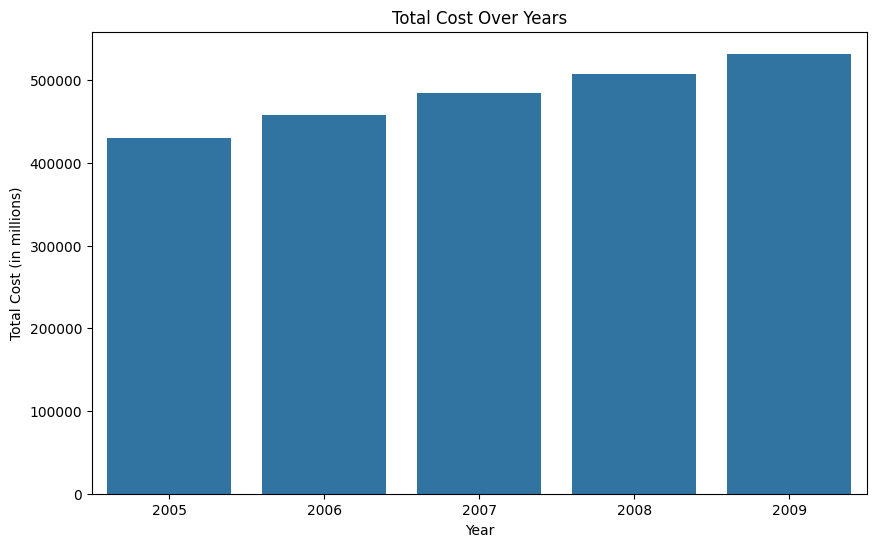

In [41]:
# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_cost.index, y=yearly_cost.values)
plt.title('Total Cost Over Years')
plt.xlabel('Year')
plt.ylabel('Total Cost (in millions)')
plt.show()

The graphs displays the increasing trend yearwise in cost because of smoking across all States.

## Pivot tables and data summary

In [42]:
# summary by year and type of cost
pivot_table = pd.pivot_table(df_cost_sel, values='Cost_mn', index=['Year'], columns=['Type_of_cost'], aggfunc=np.sum)
print(pivot_table)

Type_of_cost  Ambulatory  Hospital  Nursing Home    Other  Prescription Drugs  \
Year                                                                            
2005             34280.9  108887.0       17278.7  12861.2             41377.3   
2006             36084.8  116402.1       18026.6  13612.3             44752.4   
2007             37797.2  123310.2       19488.3  14619.3             46948.6   
2008             39743.3  129651.2       20456.5  15407.8             48390.1   
2009             41325.6  136280.7       21091.0  16457.2             50744.8   

Type_of_cost     Total  
Year                    
2005          214684.4  
2006          228877.4  
2007          242163.7  
2008          253648.9  
2009          265899.1  


<ipython-input-42-12f2d1f3c43e>:2: FutureWarning:

The provided callable <function sum at 0x7b3405df8670> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



The pivot table shows the cost due to smoking across States each year by Category of Cost.
- All cost categories show a steady increase from 2005 to 2009, reflecting a growing economic burden of smoking-related healthcare expenses.

- Hospital costs consistently account for the largest share of expenditures, rising from 108,887.0 million in 2005 to $136,280.7 million in 2009.

- Spending on prescription drugs also shows a significant rise, increasing from 41,377.3 million in 2005 to 50,744.8 million in 2009.

- The total smoking-attributable costs grew substantially, from 214,684.4 million in 2005 to 265,899.1 million in 2009, indicating a worsening economic impact.

- Ambulatory, nursing home, and "Other" costs also experienced consistent growth, underscoring the broad impact of smoking across various healthcare sectors.

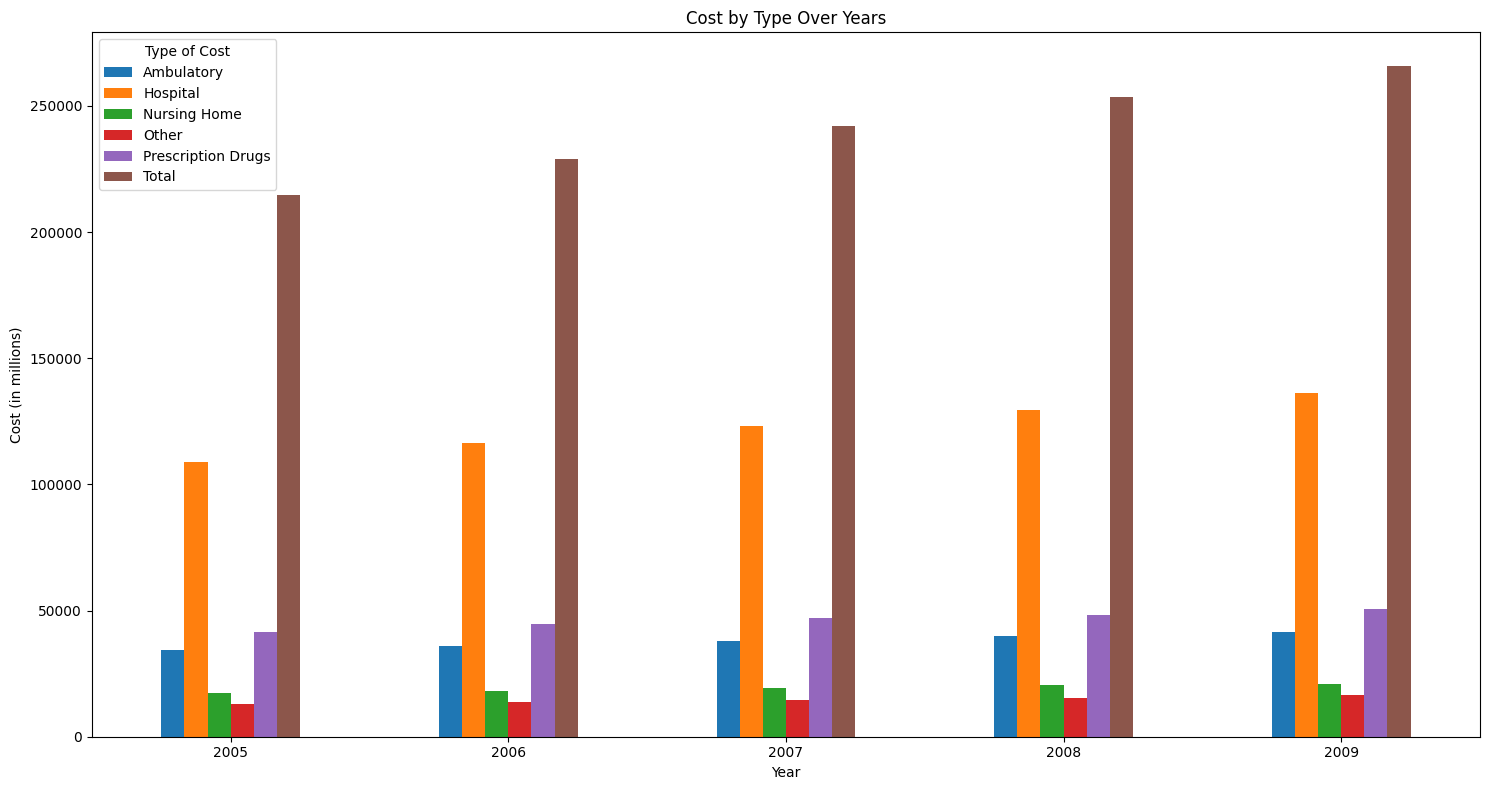

In [43]:
# graph of the pivot table
pivot_table.plot(kind='bar', figsize=(15, 8))
plt.title('Cost by Type Over Years')
plt.xlabel('Year')
plt.ylabel('Cost (in millions)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Type of Cost')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

The plot displays the pattern observed in the above pivot table.

In [44]:
# Calculate the sum of costs for each location and display top/bottom 10 states
location_cost_sum = df_cost_sel.groupby('LocationDesc')['Cost_mn'].sum()

#Sort the values and display top 10
top_10_states = location_cost_sum.sort_values(ascending=False).head(10)
print("Top 10 States by Total Expenses:")
print(top_10_states)

# Display bottom 10
bottom_10_states = location_cost_sum.sort_values(ascending=True).head(10)
print("\nBottom 10 States by Total Expenses:")
bottom_10_states

Top 10 States by Total Expenses:
LocationDesc
United States    1200864.2
California        118959.0
New York           95845.7
Texas              78742.6
Florida            77687.2
Pennsylvania       58846.0
Ohio               52061.4
Illinois           50158.5
Michigan           42229.1
New Jersey         37859.5
Name: Cost_mn, dtype: float64

Bottom 10 States by Total Expenses:


,Cost_mn
LocationDesc,
Wyoming,2270.3
North Dakota,2892.6
Vermont,3201.5
South Dakota,3322.9
District of Columbia,3553.3
Alaska,3803.5
Montana,3936.3
Idaho,4556.1
Hawaii,4665.3


# Gross Revenue on Cigarette analysis

In [45]:
# loading the data set
df_revenue = pd.read_csv("/content/Table_of_Gross_Cigarette_Tax_Revenue_Per_State__Orzechowski_and_Walker_Tax_Burden_on_Tobacco__20241211.csv")
df_revenue.head()

,LocationAbbr,LocationDesc,Year,Datasource,TopicDesc,MeasureDesc,Data_Value,Data_Value_Unit,Data_Value_Type,GeoLocation,Source,TopicTypeId,TopicId,MeasureId
0,NJ,New Jersey,1975,OW,The Tax Burden on Tobacco,Cigarette Sales,170266000,$,Dollars,"(40.130570048, -74.273691288)","Table 12- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS
1,WA,Washington,1983,OW,The Tax Burden on Tobacco,Cigarette Sales,99088106,$,Dollars,"(47.522278629, -120.47001079)","Table 12- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS
2,NM,New Mexico,2014,OW,The Tax Burden on Tobacco,Cigarette Sales,85261335,$,Dollars,"(34.520880952, -106.240580985)","Table 12- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS
3,WI,Wisconsin,1980,OW,The Tax Burden on Tobacco,Cigarette Sales,89273000,$,Dollars,"(44.393191174, -89.816370742)","Table 12- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS
4,NM,New Mexico,1976,OW,The Tax Burden on Tobacco,Cigarette Sales,14101000,$,Dollars,"(34.520880952, -106.240580985)","Table 12- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS


In [46]:
# selecting only the required columns
df_revenue_sel = df_revenue[["Year", "LocationAbbr", "LocationDesc", "Data_Value"]]
df_revenue_sel.head()

,Year,LocationAbbr,LocationDesc,Data_Value
0,1975,NJ,New Jersey,170266000
1,1983,WA,Washington,99088106
2,2014,NM,New Mexico,85261335
3,1980,WI,Wisconsin,89273000
4,1976,NM,New Mexico,14101000


In [47]:
# Rename the 'Data_Value' column to 'Revenue_mn'
df_revenue_sel = df_revenue_sel.rename(columns={'Data_Value': 'Revenue_mn'})

# Convert 'Revenue_mn' to millions
df_revenue_sel['Revenue_mn'] = df_revenue_sel['Revenue_mn'] / 1000000

# Filter data for years 2005 to 2009 (inclusive)
df_revenue_sel = df_revenue_sel[(df_revenue_sel['Year'] >= 2005) & (df_revenue_sel['Year'] <= 2009)]

print(df_revenue_sel.head())

    Year LocationAbbr    LocationDesc  Revenue_mn
19  2006           TX           Texas  507.159644
34  2006           SC  South Carolina   28.724528
42  2009           HI          Hawaii  104.433576
62  2006           WY         Wyoming   24.084000
63  2008           ND    North Dakota   20.870634


Year
2005    12475.461533
2006    13963.502470
2007    14495.201143
2008    15621.718205
2009    15753.355259
Name: Revenue_mn, dtype: float64


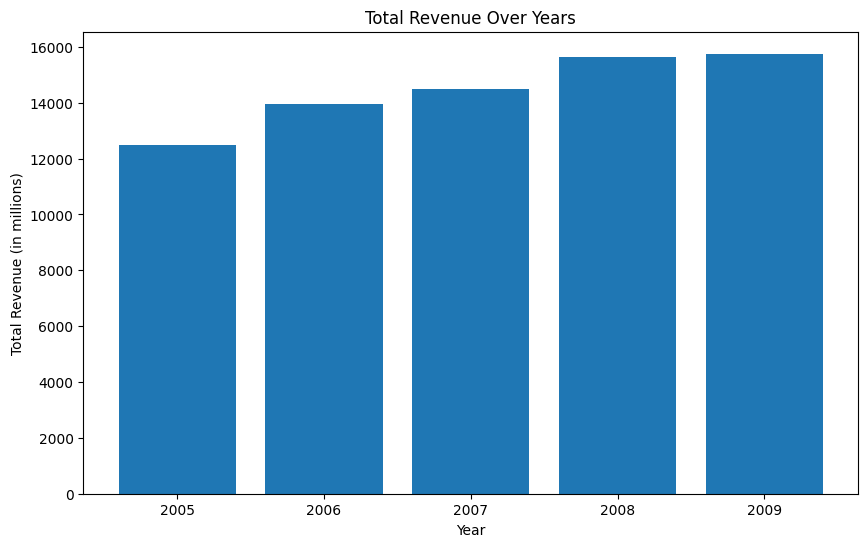

In [48]:
# Group by year and sum the revenue for all states
yearly_revenue = df_revenue_sel.groupby('Year')['Revenue_mn'].sum()
print(yearly_revenue)

# Bar chart for revenue
plt.figure(figsize=(10, 6))
plt.bar(x=yearly_revenue.index, height=yearly_revenue.values)
plt.title('Total Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Total Revenue (in millions)')
plt.show()

The summary table above and graph shows there is increasing trend in revenue on cigerrete as well

In [49]:
# Calculate the sum of revenue for each location
location_revenue_sum = df_revenue_sel.groupby('LocationDesc')['Revenue_mn'].sum()

# Sort the values and display top 10
top_10_revenue_states = location_revenue_sum.sort_values(ascending=False).head(10)
print("\nTop 10 States by Total Revenue:")
print(top_10_revenue_states)

# Display bottom 10
bottom_10_revenue_states = location_revenue_sum.sort_values(ascending=True).head(10)
print("\nBottom 10 States by Total Revenue:")
bottom_10_revenue_states


Top 10 States by Total Revenue:
LocationDesc
Michigan         5428.746600
Pennsylvania     5147.967000
New York         5107.585171
California       4958.792613
Texas            4757.435559
Ohio             4360.086891
New Jersey       3828.582362
Illinois         3080.691060
Massachusetts    2240.926887
Florida          2143.168890
Name: Revenue_mn, dtype: float64

Bottom 10 States by Total Revenue:


,Revenue_mn
LocationDesc,
North Dakota,101.785889
Wyoming,122.132546
District of Columbia,122.170000
South Carolina,137.963471
South Dakota,221.631195
Idaho,236.498826
Mississippi,258.394601
Vermont,274.634688
Utah,284.074537


- We see that most of the revenue comes from Michigan followed by Pennsylvania
- Least revenue comes from Alaska and Utah

## Function creation and function testing

- Here I am creating a function to get correlation between teo numeric data vectors.
- It includes docstring for better documentation and understanding of function.
- I have also included test cases in docstring which i further test to see if my function is working as desired.

In [50]:
# function to get the correlation between two numeric vector
# includes docstring for better docimentation and testing

def correlation(vector1, vector2):
  """
  Calculates the correlation between two numeric vectors.

  Args:
    vector1: The first numeric vector (list or numpy array).
    vector2: The second numeric vector (list or numpy array).

  Returns:
    The correlation coefficient between the two vectors.
    Returns an error message if the input is invalid or if the vectors are not of the same length.

  >>> correlation("string1", "string2")
  'Error: Input vectors must be lists or numpy arrays.'
  >>> correlation([1,2,3], [4,5])
  'Error: Input vectors must have the same length.'
  >>> correlation([1,2,3], [4,5,6])
  1.0
  """
  if not isinstance(vector1, (list, np.ndarray)) or not isinstance(vector2, (list, np.ndarray)):
    return "Error: Input vectors must be lists or numpy arrays."

  vector1 = np.array(vector1)
  vector2 = np.array(vector2)

  if len(vector1) != len(vector2):
    return "Error: Input vectors must have the same length."
  if not np.issubdtype(vector1.dtype, np.number) or not np.issubdtype(vector2.dtype, np.number):
      return "Error: Input vectors must contain numeric values."


  return np.corrcoef(vector1, vector2)[0, 1]

In [51]:
# testing the correlation function using doctest
import doctest
doctest.run_docstring_examples(correlation, globals(), verbose=True, optionflags=doctest.NORMALIZE_WHITESPACE)

Finding tests in NoName
Trying:
    correlation("string1", "string2")
Expecting:
    'Error: Input vectors must be lists or numpy arrays.'
ok
Trying:
    correlation([1,2,3], [4,5])
Expecting:
    'Error: Input vectors must have the same length.'
ok
Trying:
    correlation([1,2,3], [4,5,6])
Expecting:
    1.0
ok


We see that all the doctest is passed indicating our function is working as desired.

## Data merging

Lets do data merging to get the cost and revenue column into a same data frame for further analysis. Here I am merging the two dataframe based on year and state because these two constitutes a unique indentifier for each data points.

In [52]:
# Merge the two dataframes on 'LocationDesc' and 'Year'
merged_df = pd.merge(df_cost_sel, df_revenue_sel, on=['LocationDesc', 'Year'], how='inner')
merged_df.head()

,Year,LocationAbbr_x,LocationDesc,Type_of_cost,Cost_mn,LocationAbbr_y,Revenue_mn
0,2009,RI,Rhode Island,Other,47.2,RI,124.880200
1,2007,SD,South Dakota,Nursing Home,29.2,SD,43.184955
2,2009,NH,New Hampshire,Other,41.4,NH,190.829172
3,2006,MD,Maryland,Prescription Drugs,465.2,MD,274.107190
4,2009,LA,Louisiana,Other,117.5,LA,131.009400


## Data aggregation

In [53]:
# Group by state and calculate the total cost and revenue
statewise_data = merged_df.groupby('LocationDesc').agg({'Cost_mn': 'sum', 'Revenue_mn': 'sum'})
statewise_data

,Cost_mn,Revenue_mn
LocationDesc,,
Alabama,17591.5,4679.520720
Alaska,3803.5,1785.520878
Arizona,21374.0,10236.010464
Arkansas,11059.6,4010.184654
California,118959.0,29752.755678
Colorado,16713.0,5505.031092
Connecticut,18544.2,8744.500380
Delaware,4722.8,3003.634554
District of Columbia,3553.3,733.020000


The above table displays the statewise total revenue.

## Correlation in cost and revenue among states

In [54]:
# Calculate the correlation
correlation_result = correlation(np.array(statewise_data['Cost_mn']), np.array(statewise_data['Revenue_mn']))
print(f"The correlation between statewise cost and revenue is: {correlation_result}")

The correlation between statewise cost and revenue is: 0.8531384581868345


The high correlation value indicates there is positive association between the states revenue and cost due to smoking.

## Correlation in cost and revenue across years

In [55]:
# Calculate the correlation across years
yearly_data = merged_df.groupby('Year').agg({'Cost_mn': 'sum', 'Revenue_mn': 'sum'})
correlation_result_yearly = correlation(np.array(yearly_data['Cost_mn']), np.array(yearly_data['Revenue_mn']))
print(f"The correlation between yearly cost and revenue is: {correlation_result_yearly}")

The correlation between yearly cost and revenue is: 0.973092210173381


The high correlation value indicates. There is increasing trend in cost due to smoking and revenue on cigerrete.

# Mapping Cost and Revenue

In [56]:
# Loading the GeoJSON file
geojson_path = "/content/US.json"
states = gpd.read_file(geojson_path)

In [57]:
# Merge the GeoDataFrame and the statewise data
merged_map_data = states.merge(statewise_data, left_on='name', right_on='LocationDesc', how='inner')

In [58]:
# Map plot of Cost
fig = px.choropleth(merged_map_data, geojson=merged_map_data.geometry, locations=merged_map_data.index, color="Cost_mn",
                           color_continuous_scale="OrRd",
                           range_color=(merged_map_data["Cost_mn"].min(), merged_map_data["Cost_mn"].max()),
                           scope="usa",
                           labels={'Cost_mn':'Cost (in millions)'},
                           hover_name="name"
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [59]:
# Plotting Revenue
fig = px.choropleth(merged_map_data, geojson=merged_map_data.geometry, locations=merged_map_data.index, color="Revenue_mn",
                           color_continuous_scale="OrRd",
                           range_color=(merged_map_data["Revenue_mn"].min(), merged_map_data["Revenue_mn"].max()),
                           scope="usa",
                           labels={'Revenue_mn':'Revenue (in millions)'},
                           hover_name="name"
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Smoking Cost Revenue Reporting tool

In [60]:
# function to create cost and revenue report for speficied year

def create_cost_revenue_report(year, data_type):
    """
    Creates a cost/revenue report for a specified year, showing top 10 states and a map.

    Args:
        year: The year for which to generate the report.
        data_type: Either "cost" or "revenue".
    """

    if data_type.lower() not in ["cost", "revenue"]:
        print("Invalid data_type. Please specify 'cost' or 'revenue'.")
        return

    if data_type.lower() == "cost":
        df = df_cost_sel
        value_column = "Cost_mn"
        title_prefix = "Cost"
        cmap = 'OrRd'
    else:
        df = df_revenue_sel
        value_column = "Revenue_mn"
        title_prefix = "Revenue"
        cmap = 'GnBu'

    # Filter data for the specified year
    yearly_data = df[df["Year"] == year]

    if yearly_data.empty:
        print(f"No data found for the year {year}.")
        return

    # Calculate the sum for each location
    location_sum = yearly_data.groupby("LocationDesc")[value_column].sum()

    # Get top 10 states
    top_10 = location_sum.sort_values(ascending=False).head(10)
    print(f"Top 10 States by {title_prefix} in {year}:")
    print(top_10)

    # Merge with GeoDataFrame
    merged_map_data = states.merge(yearly_data, left_on='name', right_on='LocationDesc', how='inner')

    # Plotting the map using Plotly
    fig = px.choropleth(
        merged_map_data,
        geojson=merged_map_data.geometry,
        locations=merged_map_data.index,
        color=value_column,
        color_continuous_scale="OrRd",
        range_color=(merged_map_data[value_column].min(), merged_map_data[value_column].max()),
        scope="usa",
        labels={value_column: f'{title_prefix} (in millions)'},
        hover_name="name"
    )
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

In [61]:
# function to ask user for input and return the report and map
def get_report():
    """
    Gets user input for year and measure, then calls create_cost_revenue_report.
    """
    year = int(input("For which year do you want the report? "))
    measure = input("For what measure do you want the report? (cost or revenue): ")
    create_cost_revenue_report(year, measure)

In [62]:
# calling the get report function to get the report
get_report()

For which year do you want the report? 2007
For what measure do you want the report? (cost or revenue): cost
Top 10 States by Cost in 2007:
LocationDesc
United States    241272.3
California        23793.1
New York          19278.4
Texas             15727.7
Florida           15533.4
Pennsylvania      11857.1
Ohio              10412.1
Illinois          10225.8
Michigan           8549.0
New Jersey         7597.8
Name: Cost_mn, dtype: float64


Here we have got the cost report for 2007. Cost due to smoking by top states and map plot of the actual cost for different US states. We see that,
- California tops the list followed by New York and Texas